# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


Вариант 4

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

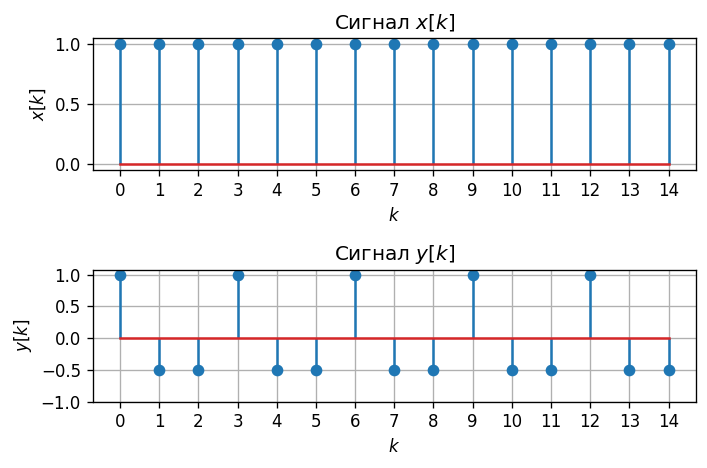

In [23]:
n0 = 5
N = 15

k = np.arange(N)
xk = np.ones(N)
yk = xk * np.cos(2 * np.pi * k * n0 / N)


plt.figure(figsize=[6, 4], dpi=120)
plt.subplot(2, 1, 1)
plt.stem(k, xk)
plt.title("Сигнал $x[k]$")
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.xticks(k)
plt.grid()
plt.tight_layout()
plt.subplot(2, 1, 2)
plt.stem(k, yk)
plt.title("Сигнал $y[k]$")
plt.xlabel("$k$")
plt.xticks(k)
plt.yticks(np.linspace(-1, 1, 5))
plt.ylabel("$y[k]$")
plt.grid()
plt.tight_layout()

Получим формулы ДВПФ для последовательностей $x[k]$ и $y[k]$:
$$
X(\nu )=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k)=\sum\limits_{k=0}^{N-1}{\exp (-j2\pi \nu k)}=\frac{1-\exp (-j2\pi \nu N)}{1-\exp (-j2\pi \nu )}=$$
$$=\frac{{{e}^{-j\pi \nu N}}}{{{e}^{-j\pi \nu }}}\frac{({{e}^{j\pi \nu N}}-{{e}^{-j\pi \nu N}})}{({{e}^{j\pi \nu }}-{{e}^{-j\pi \nu }})}=\frac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu ).
$$
$$
y[k] = x[k] \cdot \cos{\left( 2 \cdot \pi \cdot k  \cdot \frac{n_0}{N}\right)} = 
x[k] \cdot \frac{1}{2}\left(\exp{
  \left(
    j \cdot 2 \cdot \pi \cdot k  \cdot \frac{n_0}{N}
  \right)
}  + 
\exp{
  \left(
    -j \cdot 2 \cdot \pi \cdot k  \cdot \frac{n_0}{N}
    \right)
  }\right)
$$
По теореме запаздывания, а также в силу линейности ДВПФ:
$$
Y(\nu) = \frac{1}{2} \cdot \left( X(\nu - \frac{n_0}{N}) + X(\nu + \frac{n_0}{N}) \right)
$$

In [24]:
nu = np.linspace(-0.5, 0.5, 1000)
def getXnu(nu):
  return np.sin(N * np.pi * nu) / np.sin(np.pi * nu) * np.exp(-1j * (N - 1) * np.pi * nu)
Xnu = getXnu(nu)
nu0 = n0 / N
Ynu = 1/2 * (getXnu(nu - nu0) + getXnu(nu + nu0))

def show_DTFT(X, nu, name):
  plt.figure(figsize=[6, 4], dpi=120)
  plt.subplot(2, 1, 1)
  plt.plot(nu, np.abs(X))
  plt.title(f"Модуль ДВПФ {name.lower()}[k]")
  plt.xlabel("$\\nu$")
  plt.ylabel(f"$\\left|{name.upper()}(\\nu)\\right|$")
  plt.xticks(np.linspace(-0.5, 0.5, 11))
  plt.grid()
  plt.tight_layout()
  plt.subplot(2, 1, 2)
  plt.plot(nu, np.angle(X))
  plt.title(f"Фаза ДВПФ {name.lower()}[k]")
  plt.xlabel("$\\nu$")
  plt.ylabel(f"$\\varphi\\left({name.upper()}(\\nu)\\right)$")
  plt.xticks(np.linspace(-0.5, 0.5, 11))
  plt.grid()
  plt.tight_layout()

def show_DTFT_ReIm(X, nu, name):
  plt.figure(figsize=[6, 4], dpi=120)
  plt.subplot(2, 1, 1)
  plt.plot(nu, np.real(X))
  plt.title(f"Действительная часть ДВПФ {name.lower()}[k]")
  plt.xlabel("$\\nu$")
  plt.ylabel(f"$\\Re\\left({name.upper()}(\\nu)\\right)$")
  plt.xticks(np.linspace(-0.5, 0.5, 11))
  plt.grid()
  plt.tight_layout()
  plt.subplot(2, 1, 2)
  plt.plot(nu, np.imag(X))
  plt.title(f"Мнимая часть ДВПФ {name.lower()}[k]")
  plt.xlabel("$\\nu$")
  plt.ylabel(f"$\\Im\\left({name.upper()}(\\nu)\\right)$")
  plt.xticks(np.linspace(-0.5, 0.5, 11))
  plt.grid()
  plt.tight_layout()

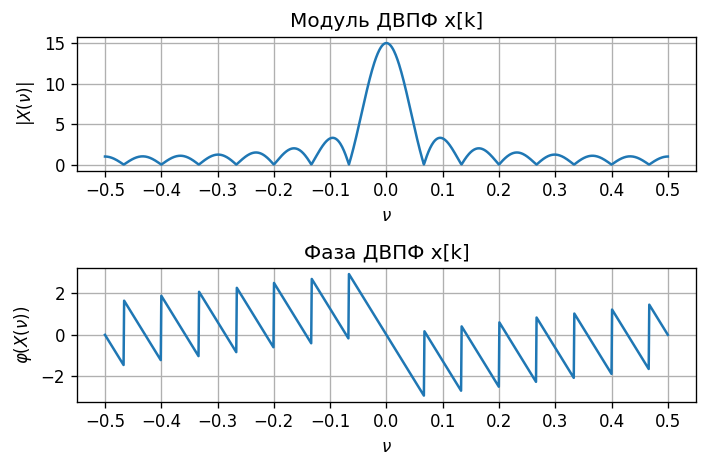

In [25]:
show_DTFT(Xnu, nu, "x")

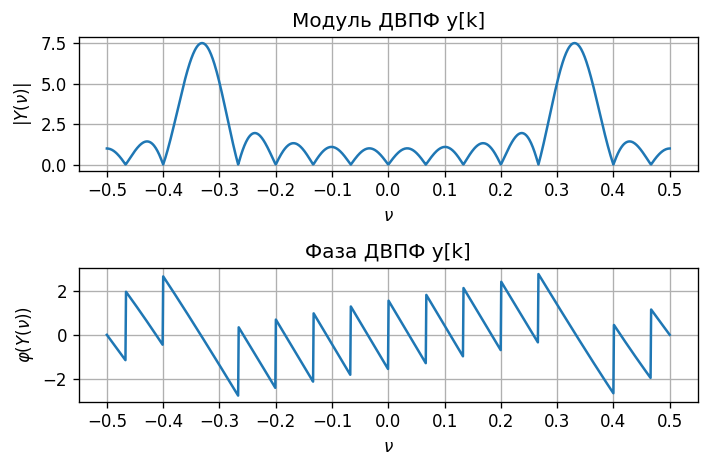

In [26]:
show_DTFT(Ynu, nu, "y")

In [27]:
def dtft(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

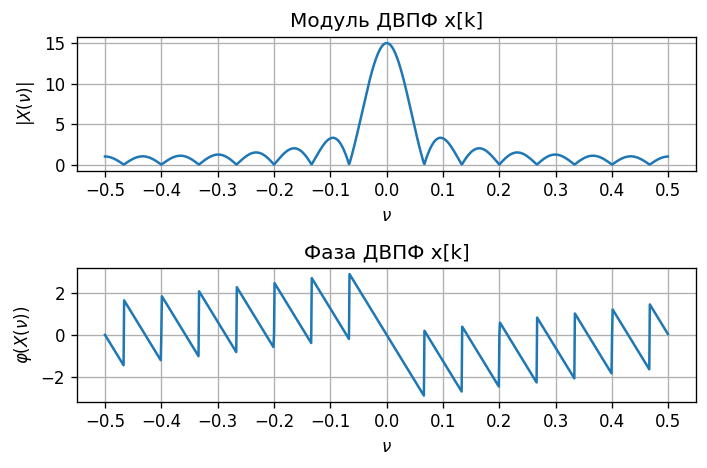

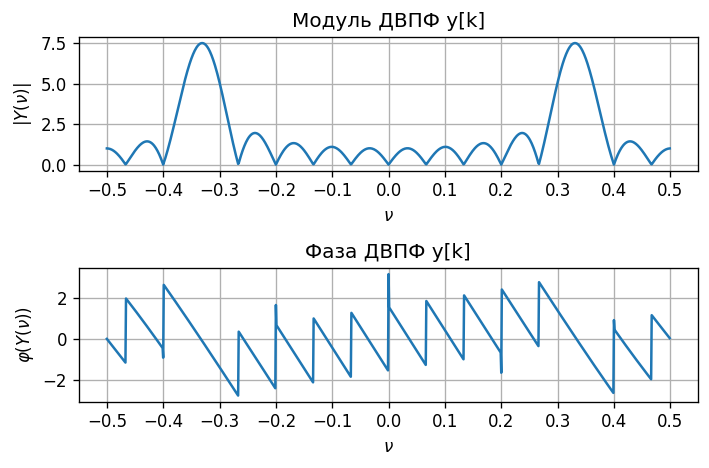

In [28]:
nu, Xfft = dtft(xk, 1000)
_, Yfft = dtft(yk, 1000)

show_DTFT(Xfft, nu, "x")
show_DTFT(Yfft, nu, "y")

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

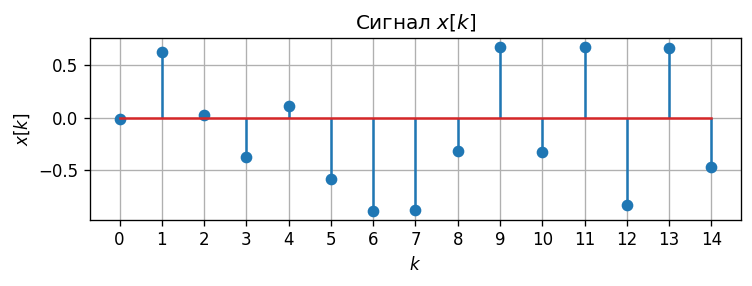

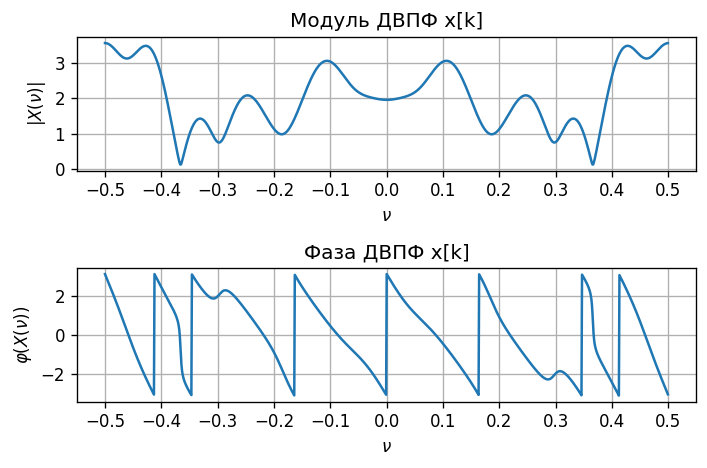

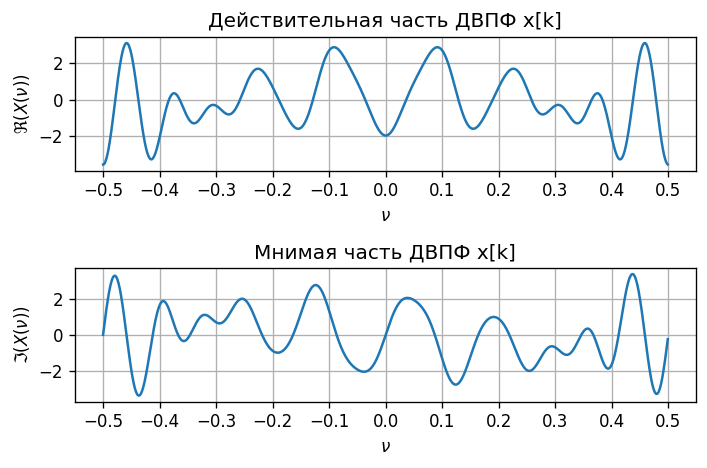

In [29]:
N = 15
k = np.arange(N)
ones = np.ones(N)
xk = np.random.uniform(-1,1, N) * ones

plt.figure(figsize=[7, 2], dpi=120)
plt.title("Сигнал $x[k]$")
plt.stem(k, xk)
plt.xticks(k)
plt.xlabel("$k$")
plt.grid()
plt.ylabel("$x[k]$")
plt.show()


nu, Xnu = dtft(xk)

show_DTFT(Xnu, nu, "x")
show_DTFT_ReIm(Xnu, nu, "x")

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

По теореме смещения:
$$
Y[n] = X[\left( n + n_0\right) \mod l] \Rightarrow 
y[k] = x[k] \cdot \exp{\left( -j \cdot 2 \pi k \cdot \frac{n0}{l} \right)}
$$

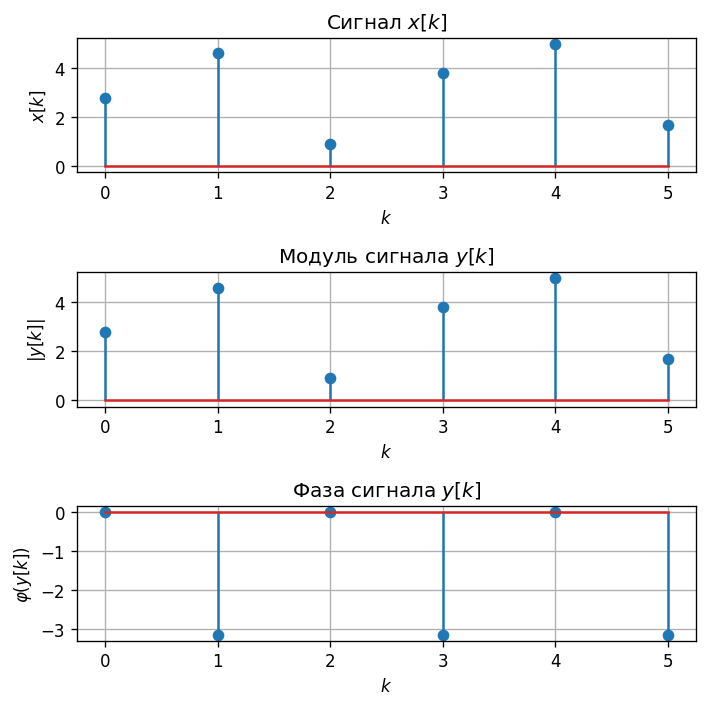

In [30]:
n0, l = 3, 6
k = np.arange(l)
xk = np.array([2.8, 4.6, 0.9, 3.8, 5.0, 1.7])
yk = xk * np.exp(-1j * 2 * np.pi * k * n0 / l)

plt.figure(figsize=[6, 6], dpi=120)
plt.subplot(3, 1, 1)
plt.stem(k, xk)
plt.title("Сигнал $x[k]$")
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.xticks(k)
plt.grid()
plt.tight_layout()
plt.subplot(3, 1, 2)
plt.stem(k, np.abs(yk))
plt.title("Модуль сигнала $y[k]$")
plt.xlabel("$k$")
plt.xticks(k)
plt.ylabel("$\\left| y[k] \\right|$")
plt.grid()
plt.tight_layout()
plt.subplot(3, 1, 3)
plt.stem(k, np.angle(yk))
plt.title("Фаза сигнала $y[k]$")
plt.xlabel("$k$")
plt.xticks(k)
plt.ylabel("$\\varphi\\left(y[k]\\right)$")
plt.grid()
plt.tight_layout()

In [31]:
X = np.fft.fft(xk)

def show_DFT(X, n, name, add=""):
  plt.figure(figsize=[6, 4], dpi=120)
  plt.subplot(2, 1, 1)
  plt.stem(n, np.abs(X))
  plt.title(f"Модуль {add} ДПФ сигнала ${name.lower()}[k]$")
  plt.xlabel("$n$")
  plt.xticks(n)
  plt.ylabel(f"$\\left| {name.upper()}[n] \\right|$")
  plt.grid()
  plt.tight_layout()
  plt.subplot(2, 1, 2)
  plt.stem(n, np.angle(X))
  plt.title(f"Фаза {add} ДПФ сигнала ${name.lower()}[k]$")
  plt.xlabel("$k$")
  plt.xticks(n)
  plt.ylabel(f"$\\varphi\\left({name.upper()}[n]\\right)$")
  plt.grid()
  plt.tight_layout()

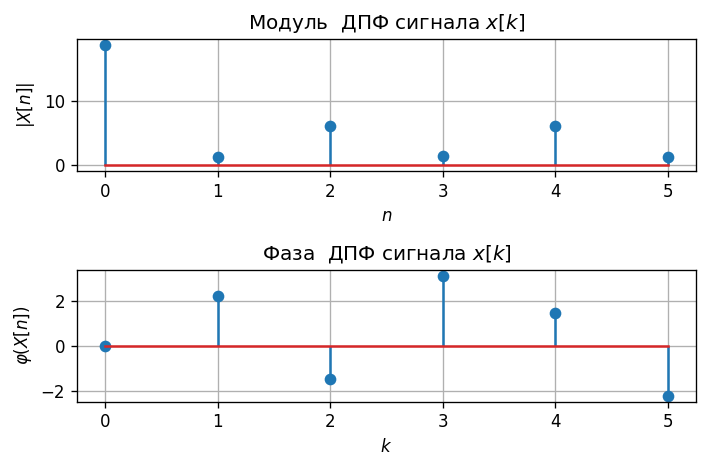

In [32]:
show_DFT(X, k, "x")

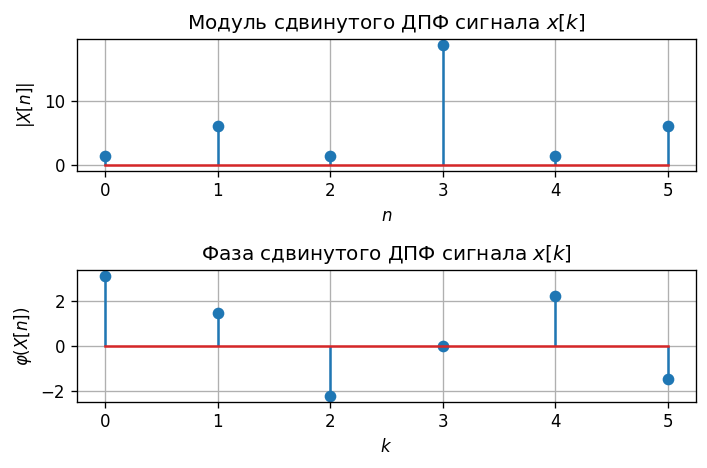

In [33]:
Y = np.roll(X, n0)
show_DFT(Y, k, "x", "сдвинутого")

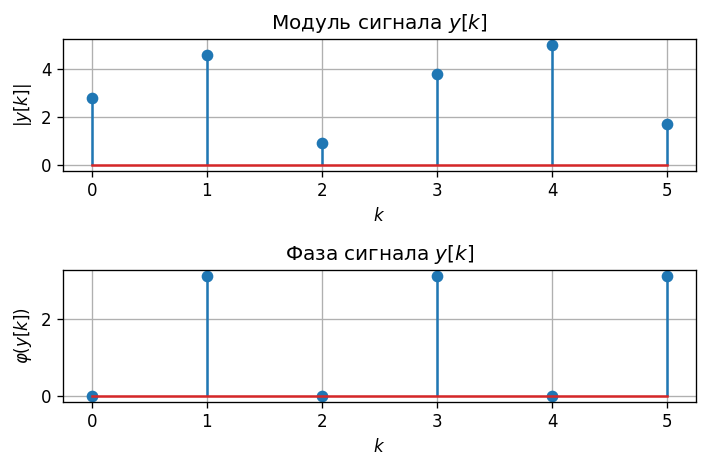

In [34]:
Y_inv = np.fft.ifft(Y)
k = np.arange(l)
plt.figure(figsize=[6, 4], dpi=120)
plt.subplot(2, 1, 1)
plt.stem(k, np.abs(Y_inv))
plt.title("Модуль сигнала $y[k]$")
plt.xlabel("$k$")
plt.xticks(k)
plt.ylabel("$\\left| y[k] \\right|$")
plt.grid()
plt.tight_layout()
plt.subplot(2, 1, 2)
plt.stem(k, np.angle(Y_inv))
plt.title("Фаза сигнала $y[k]$")
plt.xlabel("$k$")
plt.xticks(k)
plt.ylabel("$\\varphi\\left(y[k]\\right)$")
plt.grid()
plt.tight_layout()

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


Найдём значения в ДПФ.
Для действительной последовательности $x[k]$ верно, что
$$
\left\lbrace 
\begin{matrix}
x[k] = x^{*}[k]\\
x[k] \leftrightarrow^{DFT} X^{*}[N - n]_N
\end{matrix}
\right. \Rightarrow
X[n] = X^{*}[N - n]_N
$$
Таким образом, получаем:
$$
\begin{align*}
X[0] &= X^{*}[0] = 14 \\
X[11] &= X^{*}[1] = 5 - 9j\\
X[10] &= X^{*}[2] = 5 - 7j\\
X[9] &= X^{*}[3] = 4 - 6j\\
X[8] &= X^{*}[4] = 3 + 3j\\
X[7] &= X^{*}[5] = -1+5j\\
X[6] &= X^{*}[6] = 5
\end{align*}
$$

$$
X[n] =  \sum_{k=0}^{N-1} x[k] \cdot \exp{\left( 
  -j \cdot 2 \pi k \frac{n}{N}
\right)} \Rightarrow X[0] = \sum_{k=0}^{N-1} x[k] \cdot 1 = \sum_{k=0}^{N-1} x[k]
$$
Таким образом
$$
\frac{1}{N}\sum_{k=0}^{N-1} x[k] = \frac{X[0]}{N} = \frac{14}{12} = \frac{7}{6}
$$

Используем равенство Парсеваля:
$$
\sum_{k=0}^{N-1} \left| x[k] \right|^2 = \frac{1}{N} \sum_{n=0}^{N-1} \left| X[n] \right|^2
$$
Получаем для энергии сигнала:
$$
\frac{1}{12} \sum_{n=0}^{11} \left| X[n] \right|^2 = 
\frac{1}{12} \left(
196 + 106 + 74 + 52 + 18 + 
\right. \\ \left. 26 + 25 + 26 + 18 + 52 + 74 + 106
\right)  = \frac{773}{12} \approx 64.42
$$
Мощность сигнала:
$$
\frac{1}{N}\sum_{k=0}^{N-1} \left| x[k] \right|^2 = 
\frac{1}{N^2} \sum_{n=0}^{N-1} \left| X[n] \right|^2 = \frac{773}{12^2} \approx 5.37
$$

In [35]:
part = np.array([5 + 9j, 5 + 7j, 4 + 6j, 3 - 3j, -1 - 5j])

X = np.append(
    np.append(np.append(np.array([14]), part), [5]), np.conj(np.flip(part))
)
xk = np.fft.ifft(X)
print(f"Энергия: {np.sum(np.abs(xk)**2)}")
print(f"Мощность: {np.mean(np.abs(xk)**2)}")

Энергия: 64.41666666666666
Мощность: 5.3680555555555545


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

In [42]:
N, r1, r2 = 16, 7, 3
k = np.arange(N)
xk = np.cos(2 * np.pi / N * r1 * k) + np.sin(2 * np.pi / N * r2 * k)

In [43]:
def draw_DTFT_all(X, n, name):
  plt.figure(figsize=[6, 8], dpi=120)
  plt.subplot(4, 1, 1)
  plt.stem(n, np.abs(X))
  plt.title(f"Модуль ДПФ {name}")
  plt.xlabel("$n$")
  plt.ylabel(f"$\\left|X[n]\\right|$")
  plt.xticks(n)
  plt.grid()
  plt.tight_layout()
  plt.subplot(4, 1, 2)
  plt.stem(n, np.angle(X))
  plt.title(f"Фаза ДПФ {name}")
  plt.xlabel("$n$")
  plt.ylabel(f"$\\varphi\\left(X[n]\\right)$")
  plt.xticks(n)
  plt.grid()
  plt.tight_layout()
  plt.subplot(4, 1, 3)
  plt.stem(n, np.real(X))
  plt.title(f"Действительная часть ДПФ {name}")
  plt.xlabel("$n$")
  plt.ylabel(f"$\\Re\\left(X[n]\\right)$")
  plt.xticks(n)
  plt.grid()
  plt.tight_layout()
  plt.subplot(4, 1, 4)
  plt.stem(n, np.imag(X))
  plt.title(f"Мнимая часть ДПФ {name}")
  plt.xlabel("$n$")
  plt.ylabel(f"$\\Im\\left(X[n]\\right)$")
  plt.xticks(n)
  plt.grid()
  plt.tight_layout()

Прямая формула:
$$
X[n] = \sum_{k=0}^{N-1} x[k] \cdot \exp{
  \left(
    -j \cdot 2 \pi k \frac{n}{N}
  \right) 
} = \\
\sum_{k=0}^{N-1} \cos{\left(2 \pi k \frac{r_1}{N}\right)} \cdot \exp{
  \left(
    -j \cdot 2 \pi k \frac{n}{N}
  \right) 
} + 
\sum_{k=0}^{N-1} \sin{\left(2 \pi k \frac{r_2}{N} \right)} \cdot \exp{
  \left(
    -j \cdot 2 \pi k \frac{n}{N}
  \right) 
} = \\
\sum_{k=0}^{15} \cos{\left(\frac{2\pi}{16} 7k\right)}  \cdot \exp{
  \left(
    -j \frac{2 \pi}{16} nk
  \right) 
} + 
\sum_{k=0}^{15} \sin{\left(\frac{2\pi}{16}3k\right)} \cdot \exp{
  \left(
    -j \frac{2\pi}{16}nk
  \right) 
} = \\
\sum_{k=0}^{15} \frac{1}{2} \exp{\left(j\frac{2\pi}{16} 7k\right)}  \cdot \exp{
  \left(
    -j \frac{2 \pi}{16} nk
  \right) 
} + 
\sum_{k=0}^{15} \frac{1}{2} \exp{\left(-j\frac{2\pi}{16} 7k\right)}  \cdot \exp{
  \left(
    -j \frac{2 \pi}{16} nk
  \right) 
} + \\
\sum_{k=0}^{15} \frac{1}{2j}\exp{\left(j\frac{2\pi}{16}3k\right)} \cdot \exp{
  \left(
    -j \frac{2\pi}{16}nk
  \right) 
} - 
\sum_{k=0}^{15} \frac{1}{2j}\exp{\left(-j\frac{2\pi}{16}3k\right)} \cdot \exp{
  \left(
    -j \frac{2\pi}{16}nk
  \right) 
} = \\
\frac{1}{2} \left(\sum_{k=0}^{15} \exp{
  \left(
    -j \frac{2 \pi}{16} \left(n - 7\right)k
  \right) 
} + 
\sum_{k=0}^{15} \exp{
  \left(
    -j \frac{2 \pi}{16} \left(n + 7\right)k
  \right) 
}\right) + \\ 
\frac{1}{2j} \left(\sum_{k=0}^{15} \exp{
  \left(
    -j \frac{2 \pi}{16} \left(n -3\right)k
  \right) 
} -
\sum_{k=0}^{15} \exp{
  \left(
    -j \frac{2 \pi}{16} \left(n +3\right)k
  \right) 
}
\right)
$$
Для суммы вида $\sum_{k=0}^{15} \exp{
  \left(
    -j \frac{2 \pi}{16} mk
  \right) 
}$ нужно, чтобы $m$ равнялось $0$ или было кратно $N$, иначе она обращается в ноль по формуле суммы геометрической прогрессии, таким образом, получаем бины ДПФ:

$$
\left\lbrace 
\begin{matrix}
X[3] &= -8j\\
X[7] &= 8\\
X[9] &= 8\\
X[13] &= 8j
\end{matrix}
\right.
$$


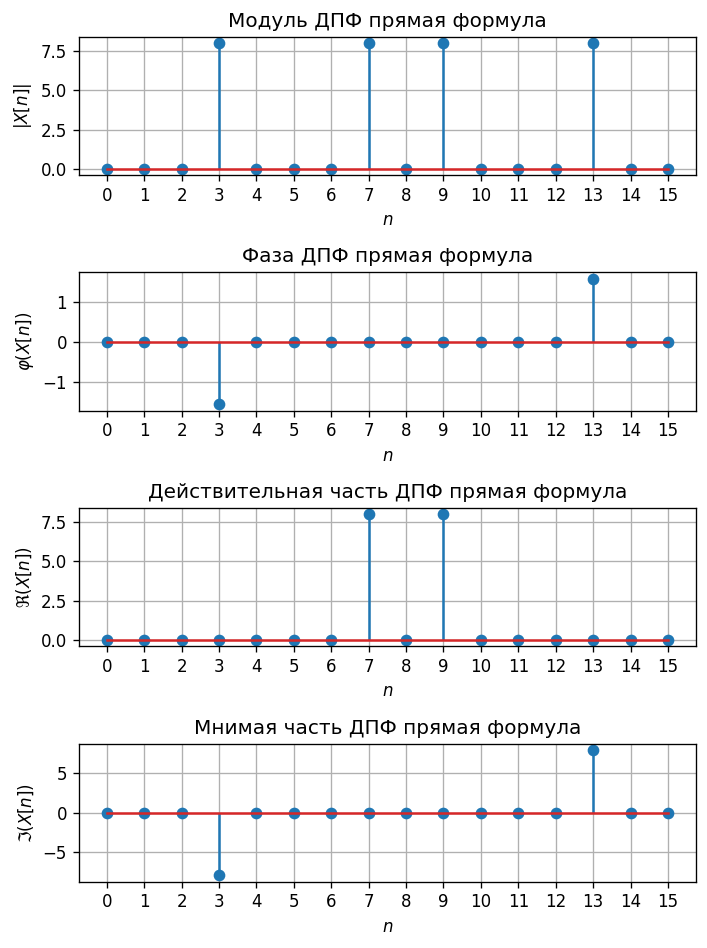

In [50]:
X_based = np.zeros(N, dtype=np.complex_)
X_based[3] = -8j
X_based[7] = 8
X_based[9] = 8
X_based[13] = 8j
draw_DTFT_all(X_based, k, "прямая формула")

$$
\sum_{m=0}^{15} \mathbb{1}[k - m]
\left(\cos{\left(\frac{2\pi}{16} 7k\right)} + \sin{\left(\frac{2\pi}{16}3k\right)}\right) = \\
\frac{1}{2}\sum_{m=0}^{15}\mathbb{1}[k - m]
\exp{\left(j\frac{2\pi}{16} 7k\right)} +
\frac{1}{2}\sum_{m=0}^{15} \mathbb{1}[k - m]
\exp{\left(-j\frac{2\pi}{16} 7k\right)} + \\
\frac{1}{2j}\sum_{m=0}^{15}\mathbb{1}[k - m]
\exp{\left(j\frac{2\pi}{16} 3k\right)} -
\frac{1}{2j}\sum_{m=0}^{15} \mathbb{1}[k - m]
\exp{\left(-j\frac{2\pi}{16} 3k\right)}
$$
Зная, что ДПФ $N$ единичных импульсов имеет только один ненулевой бин $W[0] = N$, а также используя теорему смещения, получаем:
$$
\left\lbrace 
\begin{matrix}
X[3] &= -8j\\
X[7] &= 8\\
X[9] &= 8\\
X[13] &= 8j
\end{matrix}
\right.
$$
Остальные бины ДПФ нулевые


$$
\cos{\left(\frac{2\pi}{16} 7k\right)} + \sin{\left(\frac{2\pi}{16}3k\right)} =  \\
\frac{1}{2}\exp{\left(j\frac{2\pi}{16} 7k\right)}+
\frac{1}{2}\exp{\left(-j\frac{2\pi}{16} 7k\right)} + \\
\frac{1}{2j}\exp{\left(j\frac{2\pi}{16}3k\right)}-
\frac{1}{2j}\exp{\left(-j\frac{2\pi}{16}3k\right)} = \\
\frac{1}{2}\exp{\left(j\frac{2\pi}{16} 7k\right)}+
\frac{1}{2}\exp{\left(j\frac{2\pi}{16} 9k\right)} + \\
\frac{1}{2j}\exp{\left(j\frac{2\pi}{16}3k\right)}-
\frac{1}{2j}\exp{\left(j\frac{2\pi}{16}13k\right)}
$$
Таким образом, получаем, что
$$
\left\lbrace 
\begin{matrix}
\widetilde{X}[3] &= -0.5j\\
\widetilde{X}[7] &= 0.5\\
\widetilde{X}[9] &= 0.5\\
\widetilde{X}[13] &= 0.5j
\end{matrix}
\right.
$$
Откуда после нормировки
$$
\left\lbrace 
\begin{matrix}
X[3] &= -8j\\
X[7] &= 8\\
X[9] &= 8\\
X[13] &= 8j
\end{matrix}
\right.
$$

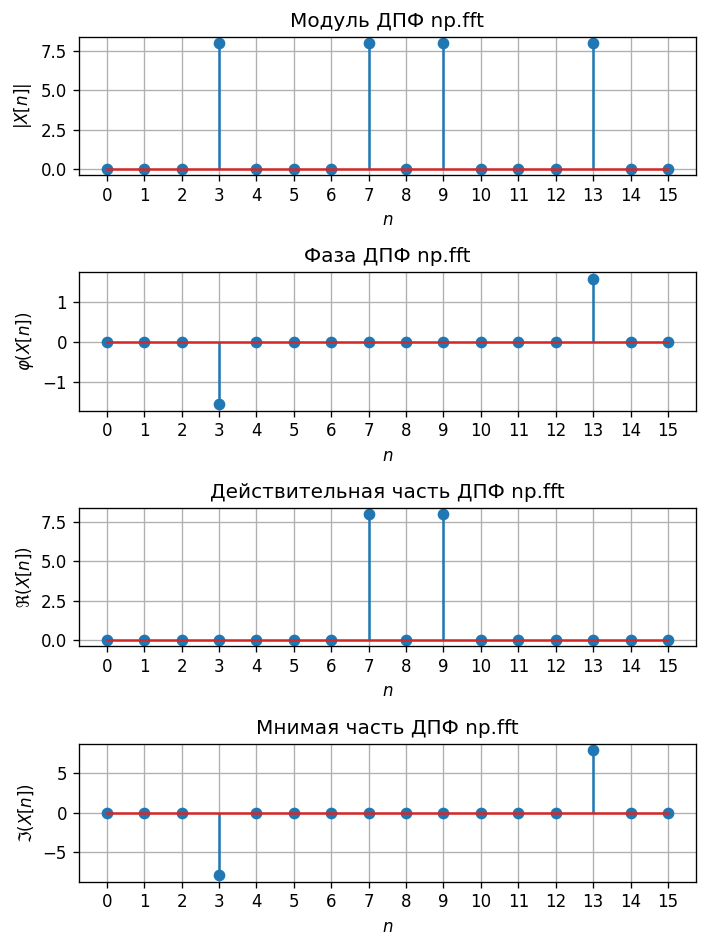

In [59]:
X_fft = np.fft.fft(xk)
X_fft[np.abs(X_fft) < 1e-13] = 0
draw_DTFT_all(X_fft, k, "np.fft")

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.